#  Web Scraping and Databases: A Hybrid Approach
While web scraping is often used to extract data for immediate use, it does not store it. A powerful workflow would be:
- **Scrape data** from online sources.
- **Store it in a structured database (SQL or NoSQL)** for long-term analysis.
- **Query it later** instead of repeatedly scraping.


## Web Scraping as a Data Acquisition Method
Web scraping is a method of extracting **external data** from structured or semi-structured sources on the web and transforming it into a usable format. Unlike databases or file storage, web scraping **does not inherently store data**—it is a way to retrieve and structure data from the web dynamically. It allows access to **data stored in HTML web pages** that might not be available via an API.

### Web Scraping vs. APIs
| Feature         | Web Scraping | APIs |
|---------------|-------------|------|
| **Access** | Extracts data from web pages (HTML tables, text, lists) | Queries structured data from a service (often JSON or XML) |
| **Structure** | Often semi-structured (needs parsing) | Well-structured |
| **Reliability** | Pages may change, breaking the scraper | More stable (unless API changes) |
| **Use Case** | Extracting tables, research data, metadata from articles | Accessing structured datasets (PubChem, NCBI, weather data) |

Thus, **web scraping is an alternative to APIs when structured access is unavailable**.

---

## Web Scraping as a Bridge from Classical Literature to Structured Data
Scientific data has historically been communicated through **journal articles, textbooks, and reports**. Many modern scientific knowledge repositories (e.g., Wikipedia, research databases) still store information in text-based formats rather than structured databases. Web scraping allows you to:

- Extract **tabular data** (like chemical properties from Wikipedia or patents).
- Retrieve **text-based metadata** (such as author names, abstracts, and citations).
- Collect **non-tabular structured information** (like structured web pages with lists of elements).

By applying **text parsing, table extraction, and structured storage**, web scraping allows researchers to **convert human-readable content into machine-readable data**.


# 2. Setting up your env
```bash
conda activate your-webscrape-env
conda install -c conda-forge beautifulsoup4 requests lxml
```

- `beautifulsoup4`: The core parsing library.
- `requests`: To fetch web pages.
- `lxml`: A fast and efficient HTML/XML parser (optional but recommended for performance).

the image below shows how I set up a webscrape environment while also connecting the kernel to Jupyter lab runninig in the base env.


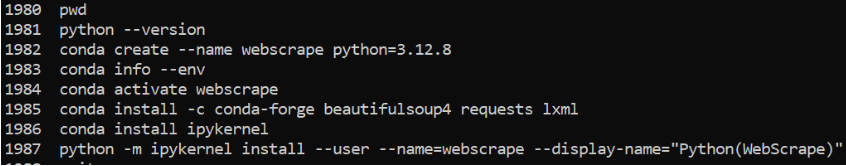


Webscrape a wikipedia element box

In [3]:
import os
import json
import requests
from bs4 import BeautifulSoup
from datetime import datetime  # <- make sure this is at the top of your script

# Define the directory and file path
wikipedia_dir = os.path.expanduser("~/data/wikipedia/")
os.makedirs(wikipedia_dir, exist_ok=True)  # Ensure the directory exists

carbon_wikipedia_path = os.path.join(wikipedia_dir, "carbon_data.json")

def scrape_infobox(element_name):
    """Scrapes the Wikipedia infobox for a given element and returns a dictionary of properties."""
    
    url = f"https://en.wikipedia.org/wiki/{element_name}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the Infobox element
    infobox = soup.find('table', class_='infobox')

    # Dictionary to store element properties
    element_data = {}


    # Loop through table rows and extract key-value pairs
    for row in infobox.find_all('tr'):
        header = row.find('th')
        value = row.find('td')

        if header and value:
            key = header.get_text(strip=True)  # Get property name
            val = value.get_text(" ", strip=True)  # Extract value, keeping spaces
            element_data[key] = val

    # Add provenance metadata
    element_data["_source"] = {
        "Wikipedia_URL": url,
        "Scraped_from": "Wikipedia Infobox Element",
        #"Scraped_on": requests.get("https://worldtimeapi.org/api/timezone/Etc/UTC").json()['datetime']
        "Scraped_on": datetime.utcnow().isoformat() + "Z"
    }

    return {element_name: element_data}

# Scrape data for Hydrogen
carbon_data = scrape_infobox("Carbon")

# Save JSON data to file
with open(carbon_wikipedia_path, "w", encoding="utf-8") as f:
    json.dump(carbon_data, f, indent=4, ensure_ascii=False)

print(f"Data saved successfully to: {carbon_wikipedia_path}")


Data saved successfully to: /home/rebelford/data/wikipedia/carbon_data.json


Print out the available properties for hydrogen

In [4]:
import os
import json

# Define file path
wikipedia_dir = os.path.expanduser("~/data/wikipedia/")
hydrogen_wikipedia_path = os.path.join(wikipedia_dir, "hydrogen_data.json")

# Load the JSON file
with open(hydrogen_wikipedia_path, "r", encoding="utf-8") as f:
    hydrogen_data = json.load(f)

# Extract Hydrogen properties
hydrogen_properties = hydrogen_data.get("Hydrogen", {})

# Print all keys (property names)
print("Properties available for Hydrogen:")
for key in hydrogen_properties.keys():
    print("-", key)

print("\n")


# Print value for a specific key ("Named by") with provenance
key_to_lookup = "Named by"
value = hydrogen_properties.get(key_to_lookup, "Property not found")

source_url = hydrogen_properties.get("_source", {}).get("Wikipedia_URL", "Unknown Source")

print(f"{key_to_lookup}: {value}")
print(f"(Source: {source_url})")


Properties available for Hydrogen:
- Appearance
- 
- Atomic number(Z)
- Group
- Period
- Block
- Electron configuration
- Electrons per shell
- PhaseatSTP
- Melting point
- Boiling point
- Density(at STP)
- when liquid (atm.p.)
- when liquid (atb.p.)
- Triple point
- Critical point
- Heat of fusion
- Heat of vaporization
- Molar heat capacity
- P(Pa)
- atT(K)
- Oxidation states
- Electronegativity
- Ionization energies
- Covalent radius
- Van der Waals radius
- Natural occurrence
- Crystal structure
- Lattice constants
- Thermal conductivity
- Magnetic ordering
- Molar magnetic susceptibility
- Speed of sound
- CAS Number
- Discoveryand first isolation
- Named by
- Recognized as anelementby
- Main isotopes
- 1H
- 2H
- 3H
- _source


Named by: Property not found
(Source: https://en.wikipedia.org/wiki/Hydrogen)


Scrape the chem infoboxes of the halogens

In [5]:
import os
import json
import requests
from bs4 import BeautifulSoup
from datetime import datetime, timezone

# Define the list of halogens (either names or symbols)
halogens = ["Fluorine", "Chlorine", "Bromine", "Iodine", "Astatine"]

# Define file path for saving the scraped data
wikipedia_dir = os.path.expanduser("~/data/wikipedia/")
os.makedirs(wikipedia_dir, exist_ok=True)  # Ensure directory exists
halogens_wikipedia_path = os.path.join(wikipedia_dir, "halogens_data.json")


def scrape_infobox(element_name):
    """Scrapes the Wikipedia infobox for a given element and returns a dictionary of properties."""
    
    url = f"https://en.wikipedia.org/wiki/{element_name}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the Infobox element
    infobox = soup.find('table', class_='infobox')

    # Dictionary to store element properties
    element_data = {}
   

    # Loop through table rows and extract key-value pairs
    for row in infobox.find_all('tr'):
        header = row.find('th')
        value = row.find('td')

        if header and value:
            key = header.get_text(strip=True)  # Get property name
            val = value.get_text(" ", strip=True)  # Extract value, preserving spaces
            element_data[key] = val

    # Add provenance metadata
    element_data["_source"] = {
        "Wikipedia_URL": url,
        "Scraped_from": "Wikipedia Infobox Element",
        "Scraped_on": datetime.now(timezone.utc).isoformat()  # UTC time with explicit timezone
    }
  
    return {element_name: element_data}


# Create dictionary of dictionaries for all halogens
halogens_data = {}

for element in halogens:
    halogens_data.update(scrape_infobox(element))

# Save JSON data to file
with open(halogens_wikipedia_path, "w", encoding="utf-8") as f:
    json.dump(halogens_data, f, indent=4, ensure_ascii=False)

print(f"Data saved successfully to: {halogens_wikipedia_path}")


Data saved successfully to: /home/rebelford/data/wikipedia/halogens_data.json


Now go to user-home/data/wikipedia/ and open the json file for halogens and explore